# When we have repeated measurement, can we use fixed effect, or should we use random effect models?

In [43]:
#library
library(magrittr)
library(ggsci)
library(ggplot2)
library(lme4)
library(lmerTest)

## Generate data
- 10 individuals in each of two groups (G1, G2)
- 5 measurement/individual
- Our expectation: higher expression of gene X in G2 than G1
- Covariate: gender (individual specific), batch (individual non-specific)

In [24]:
df <- data.frame()

#group 1: mean=5
for(i in 1:10){
    ID=paste0("Ind",i)
    Exp=rnorm(n=5,mean = 5)
    Gender=sample(x=c(1,0),size=1, replace = T,prob=c(0.5,0.5))
    Batch=sample(x=c(1,0),size=5, replace = T,prob=c(0.5,0.5))
    dump <- data.frame(ID,Exp,Gender,Batch,Group="G1")
    df <- rbind(df,dump)
}

#group 2: mean=6
for(i in 11:20){
    ID=paste0("Ind",i)
    Exp=rnorm(n=5,mean = 6)
    Gender=sample(x=c(1,0),size=1, replace = T,prob=c(0.5,0.5))
    Batch=sample(x=c(1,0),size=5, replace = T,prob=c(0.5,0.5))
    dump <- data.frame(ID,Exp,Gender,Batch,Group="G2")
    df <- rbind(df,dump)
}

In [25]:
head(df,n=20)

ID,Exp,Gender,Batch,Group
Ind1,5.654333,1,1,G1
Ind1,5.153864,1,1,G1
Ind1,5.536809,1,0,G1
Ind1,6.342920,1,1,G1
Ind1,7.395464,1,0,G1
Ind2,6.028979,0,0,G1
Ind2,6.014417,0,0,G1
Ind2,3.876124,0,0,G1
Ind2,3.594028,0,0,G1
Ind2,4.198419,0,0,G1


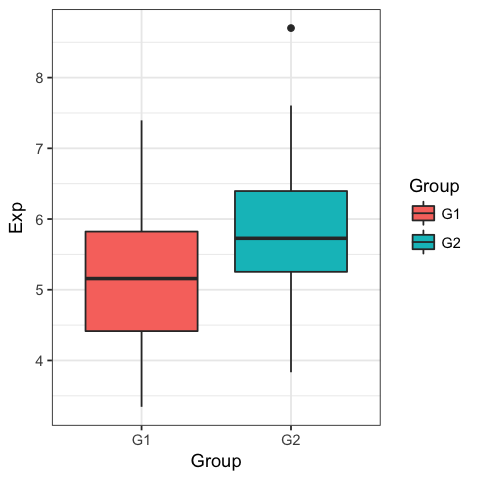

In [26]:
#visualize
options(repr.plot.width=4, repr.plot.height=4)
df %>% ggplot(aes(x=Group,y=Exp,fill=Group)) +
    geom_boxplot() +
    theme_bw()

## LM without covariates

In [35]:
mod1 <- lm(Exp ~ Group,data=df)
summary(mod1)$coefficients
#off course, the Group term is significant

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.1263974,0.1319196,38.860013,2.395088e-61
GroupG2,0.7001584,0.1865625,3.752943,2.962688e-04


## LM with covariates

In [36]:
mod1 <- lm(Exp ~ Group + Gender + Batch,data=df)
summary(mod1)$coefficients
#off course, the Group term is significant

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.032124206,0.1937939,25.96636804,3.377426e-45
GroupG2,0.658999228,0.1911280,3.44794647,8.402223e-04
Gender,-0.004813373,0.1972081,-0.02440758,9.805782e-01
Batch,0.231336156,0.1902339,1.21606154,2.269432e-01


## LM with a fixed effect individual term

In [38]:
mod1 <- lm(Exp ~ Group  + ID,data=df)
summary(mod1)$coefficients
#the significance of Group term was canceled completely.

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.01667826,0.4276300,14.06982197,2.426271e-23
GroupG2,-0.09520070,0.6047602,-0.15741892,8.753113e-01
IDInd2,-1.27428483,0.6047602,-2.10709118,3.824238e-02
IDInd3,-1.05482315,0.6047602,-1.74420076,8.496500e-02
IDInd4,-0.65154192,0.6047602,-1.07735586,2.845593e-01
IDInd5,-0.92155569,0.6047602,-1.52383661,1.314930e-01
IDInd6,-0.90807498,0.6047602,-1.50154560,1.371514e-01
IDInd7,-0.84474983,0.6047602,-1.39683442,1.663263e-01
IDInd8,-0.60549464,0.6047602,-1.00121447,3.197419e-01
IDInd9,-1.03950011,0.6047602,-1.71886337,8.950681e-02


## LMM with a random effect individual term

In [45]:
mod1 <- lmer(Exp ~ Group  + (1|ID),data=df)
summary(mod1)$coefficients
#the significance of Group term was mainteined.

,Estimate,Std. Error,df,t value,Pr(>|t|)
(Intercept),5.1263974,0.1319196,98,38.860013,2.395088e-61
GroupG2,0.7001584,0.1865625,98,3.752943,2.962688e-04
